In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=d6e47385b703c4527166627b10e3fa0d240f75da753f9ad05822d4aa91e517f4
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from pandas_datareader import data
import pandas as pd
from sklearn import metrics

In [ ]:
#dataset= data.DataReader('AAPL', 'yahoo', start='2012/01/01', end='2021/06/01')
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

yf.pdr_override()

start = datetime.strptime('2014-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-06-01', '%Y-%m-%d')

dataset = pdr.get_data_yahoo("AAPL", start, end)
dataset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.568451,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.182550,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.276245,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.152693,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.261324,258529600
...,...,...,...,...,...,...
2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900
2021-05-25,127.820000,128.320007,126.320000,126.900002,126.900002,72009500
2021-05-26,126.959999,127.389999,126.419998,126.849998,126.849998,56575900


In [ ]:


dataset.head

<bound method NDFrame.head of                   Open        High  ...   Adj Close     Volume
Date                                ...                       
2014-01-02   19.845715   19.893929  ...   17.568451  234684800
2014-01-03   19.745001   19.775000  ...   17.182550  392467600
2014-01-06   19.194643   19.528570  ...   17.276245  412610800
2014-01-07   19.440001   19.498571  ...   17.152693  317209200
2014-01-08   19.243214   19.484285  ...   17.261324  258529600
...                ...         ...  ...         ...        ...
2021-05-24  126.010002  127.940002  ...  127.099998   63092900
2021-05-25  127.820000  128.320007  ...  126.900002   72009500
2021-05-26  126.959999  127.389999  ...  126.849998   56575900
2021-05-27  126.440002  127.639999  ...  125.279999   94625600
2021-05-28  125.570000  125.800003  ...  124.610001   71311100

[1865 rows x 6 columns]>

In [ ]:

dataset.shape

(1865, 6)

In [ ]:

dataset.drop('Adj Close' ,axis = 1, inplace = True)

In [ ]:

dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600


In [ ]:



dataset.isnull().sum() 

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1865 entries, 2014-01-02 to 2021-05-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1865 non-null   float64
 1   High    1865 non-null   float64
 2   Low     1865 non-null   float64
 3   Close   1865 non-null   float64
 4   Volume  1865 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 87.4 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1865.000000,1865.000000,1865.000000,1865.000000,1.865000e+03
mean,49.126930,49.645738,48.604722,49.143138,1.579069e+08
std,30.897082,31.302149,30.424195,30.870000,8.685665e+07
min,17.684999,17.911785,17.626785,17.849285,4.544800e+07
25%,27.900000,28.117500,27.552500,27.932501,9.960040e+07
50%,38.959999,39.270000,38.580002,38.959999,1.342728e+08
75%,54.607498,55.240002,54.154999,54.582500,1.903624e+08
max,143.600006,145.089996,141.369995,143.160004,1.065523e+09


In [ ]:
print(len(dataset))

1865


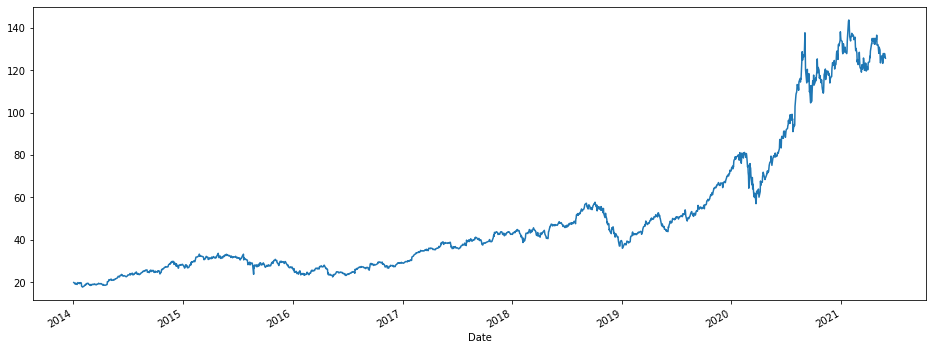

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']
print(X)

                  Open        High         Low     Volume
Date                                                     
2014-01-02   19.845715   19.893929   19.715000  234684800
2014-01-03   19.745001   19.775000   19.301071  392467600
2014-01-06   19.194643   19.528570   19.057142  412610800
2014-01-07   19.440001   19.498571   19.211430  317209200
2014-01-08   19.243214   19.484285   19.238930  258529600
...                ...         ...         ...        ...
2021-05-24  126.010002  127.940002  125.940002   63092900
2021-05-25  127.820000  128.320007  126.320000   72009500
2021-05-26  126.959999  127.389999  126.419998   56575900
2021-05-27  126.440002  127.639999  125.080002   94625600
2021-05-28  125.570000  125.800003  124.550003   71311100

[1865 rows x 4 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)


In [ ]:
X_train.shape
print(X_train)

                 Open       High        Low     Volume
Date                                                  
2020-06-03  81.165001  81.550003  80.574997  104491200
2015-11-09  30.240000  30.452499  30.012501  135485600
2015-12-14  28.045000  28.170000  27.447500  257274800
2014-04-01  19.205713  19.352501  19.170357  200760000
2020-05-18  78.292503  79.125000  77.580002  135178400
...               ...        ...        ...        ...
2017-04-27  35.980000  36.040001  35.827499   56985200
2018-10-30  52.787498  53.794998  52.317501  146640000
2020-07-28  94.367500  94.550003  93.247498  103625600
2016-03-23  26.620001  26.767500  26.475000  102814000
2016-09-20  28.262501  28.530001  28.127501  138057200

[1398 rows x 4 columns]


In [ ]:
X_test.shape
print(X_test)

                 Open       High        Low     Volume
Date                                                  
2017-10-20  39.152500  39.437500  38.990002   95896400
2015-01-06  26.635000  26.857500  26.157499  263188400
2018-03-13  45.647499  45.875000  44.810001  126774000
2014-05-06  21.492857  21.586071  21.228930  374564400
2019-02-06  43.662498  43.892502  43.212502  112958400
...               ...        ...        ...        ...
2019-05-07  51.470001  51.855000  50.207500  155054800
2015-11-30  29.497499  29.852501  29.437500  156721200
2014-02-04  18.066071  18.195000  17.955713  376681200
2018-05-07  46.294998  46.917500  46.187500  169805600
2014-03-10  18.870001  19.047501  18.869286  178584000

[467 rows x 4 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)

[-5.52257957e-01  7.55830374e-01  7.96928811e-01 -1.80392146e-10]


In [ ]:
print(regressor.intercept_)

0.0326589187517925


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(X_test)

                 Open       High        Low     Volume
Date                                                  
2017-10-20  39.152500  39.437500  38.990002   95896400
2015-01-06  26.635000  26.857500  26.157499  263188400
2018-03-13  45.647499  45.875000  44.810001  126774000
2014-05-06  21.492857  21.586071  21.228930  374564400
2019-02-06  43.662498  43.892502  43.212502  112958400
...               ...        ...        ...        ...
2019-05-07  51.470001  51.855000  50.207500  155054800
2015-11-30  29.497499  29.852501  29.437500  156721200
2014-02-04  18.066071  18.195000  17.955713  376681200
2018-05-07  46.294998  46.917500  46.187500  169805600
2014-03-10  18.870001  19.047501  18.869286  178584000

[467 rows x 4 columns]


In [ ]:
predicted.shape

(467,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [ ]:
print(dfr)

               Actual  Predicted
Date                            
2017-10-20  39.062500  39.273396
2015-01-06  26.565001  26.421170
2018-03-13  44.992500  45.184695
2014-05-06  21.228930  21.328843
2019-02-06  43.560001  43.511893
...               ...        ...
2019-05-07  50.715000  50.785358
2015-11-30  29.575001  29.737178
2014-02-04  18.171070  18.049336
2018-05-07  46.290001  46.705067
2014-03-10  18.961430  19.013493

[467 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual,Predicted
Date,,
2017-10-20,39.062500,39.273396
2015-01-06,26.565001,26.421170
2018-03-13,44.992500,45.184695
2014-05-06,21.228930,21.328843
2019-02-06,43.560001,43.511893
2020-01-09,77.407501,77.246048
2019-08-22,53.115002,53.090886
2014-01-29,17.883928,17.889810
2020-08-04,109.665001,109.847714


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#regressor.score(X_test,y_test)

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.2377164733201697


In [ ]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 0.2510914093778794


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.5010902207964942


In [ ]:
graph=dfr.head(20)

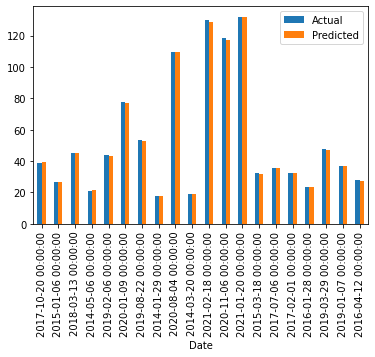

In [ ]:
graph.plot(kind='bar')